# Introduction

For Week 5 project on Unsupervised Machine Learning, we'll be analyzing the Fifa World Cup 2022 data and using unsupervised learning techniques. At the time of making this report, Fifa World Cup 2022 has begun and matches are hosted in the Country of Qatar so it's the perfect time to be analyzing this data and seeing what insights we can gain about soccer at the highest level.
   
This assignment is based on __demonstrating the use of unsupervised learning__ so we'll be using what we learned in class such as principle components analysis, heirarchical and Kmeans clustering to predict groups and see how well they match with actual labeled groups such as home continent or whether a team win or loses.
   
__Questions we'll be addressing:__ 
<br>

_1. Can the teams from the 6 different continents being accurately be clustered and predicted?_ <br>
_2. Is there really home team advantage?_
<br>   
We won't be making predictions of which team is likely going to win Fifa World Cup 2022 because: 
1. There are plenty of excellent work on this in Kaggle so if you're curious to learn more, I'd suggest you check them out!
2. Unsupervised learning alone is not the best way to make such predictions and our focus is on unsupervised learning. 
   
We'll be comparing our our model performances to supervised learning approaches such as categorical naive bayes(cb), k-nearest neighbors(knn), adaboost(adb) and randomforest(rf) models and then drawing conclusions from our overall analysis at the end.

The data we'll be analyzing for this final project is called "international_matches.csv" and it's publicly available on kaggle.com <br>
URL: https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022?resource=download

The dataset contains contains data on international soccer matches and team strength from year 1993 to 2022.
The context of the dataset posted below directly from kaggle below:

_"The FIFA World Cup is the most prestigious football tournament in the world. The championship has been awarded every four years since the start of the tournament in 1930._

_The current format involves a qualification phase, which takes place over the preceding three years, to determine which teams quality for the tournament. In the tournament, 32 teams, including the host nation, compete for the title at different stadiums in the host country._

_The reigning champion is France, which beat Croatia in the 2018 tournament in Russia. Qatar will host the 2022 tournament, for which the first match will be played in November._

_This dataset provides a complete overview of all international soccer matches played since the 90s. On top of that, the strength of each team is provided by incorporating actual FIFA rankings as well as player strengths based on the EA Sport FIFA video game."_

# Project Overview

1. Load data, Exploratory Data Analysis (EDA), and cleaning
2. Data preprocessing and dimensionality reduction with PCA
3. Hierarchical, Kmeans clustering and performance evaluation
4. Compare unsupervised clustering to supervised models: cb, knn, adb and rf
5. Discussion/Conclusion

### 1. Load data, Exploratory Data Analysis (EDA), and cleaning

In [51]:
##Load packages

import pandas as pd
import numpy as np
import seaborn as sns
from itertools import permutations, chain, cycle
import scipy.stats as stats
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
##from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

This dataset contains several factors and many rows so it's perfect for exploratory data analysis and visualization. It also looks to be great practice for both unsupervised and supervised learning techniques. We'll begin with loading the data and taking a good look into the dataset and structure.

In [52]:
df= pd.read_csv('international_matches.csv', sep= ',')

## Quick view of the data
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [53]:
## Let's check the data shapes
df.shape
## our train data has 1490 rows and 3 features whereas the test and solution set have the same shape

(23921, 25)

In [54]:
for col in df.columns:
    print(col, "has", df[col].nunique(), "unique values")

date has 5550 unique values
home_team has 211 unique values
away_team has 211 unique values
home_team_continent has 6 unique values
away_team_continent has 6 unique values
home_team_fifa_rank has 211 unique values
away_team_fifa_rank has 211 unique values
home_team_total_fifa_points has 1686 unique values
away_team_total_fifa_points has 1679 unique values
home_team_score has 21 unique values
away_team_score has 18 unique values
tournament has 82 unique values
city has 1576 unique values
country has 217 unique values
neutral_location has 2 unique values
shoot_out has 2 unique values
home_team_result has 3 unique values
home_team_goalkeeper_score has 50 unique values
away_team_goalkeeper_score has 50 unique values
home_team_mean_defense_score has 127 unique values
home_team_mean_offense_score has 103 unique values
home_team_mean_midfield_score has 134 unique values
away_team_mean_defense_score has 127 unique values
away_team_mean_offense_score has 103 unique values
away_team_mean_midfiel

Our features of interest are "home_team_continent" and "home_team_result" as well 

In [55]:
## Let's view the data statistics
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


[[<AxesSubplot:title={'center':'home_team_fifa_rank'}>
  <AxesSubplot:title={'center':'away_team_fifa_rank'}>
  <AxesSubplot:title={'center':'home_team_total_fifa_points'}>
  <AxesSubplot:title={'center':'away_team_total_fifa_points'}>]
 [<AxesSubplot:title={'center':'home_team_score'}>
  <AxesSubplot:title={'center':'away_team_score'}>
  <AxesSubplot:title={'center':'home_team_goalkeeper_score'}>
  <AxesSubplot:title={'center':'away_team_goalkeeper_score'}>]
 [<AxesSubplot:title={'center':'home_team_mean_defense_score'}>
  <AxesSubplot:title={'center':'home_team_mean_offense_score'}>
  <AxesSubplot:title={'center':'home_team_mean_midfield_score'}>
  <AxesSubplot:title={'center':'away_team_mean_defense_score'}>]
 [<AxesSubplot:title={'center':'away_team_mean_offense_score'}>
  <AxesSubplot:title={'center':'away_team_mean_midfield_score'}>
  <AxesSubplot:> <AxesSubplot:>]]


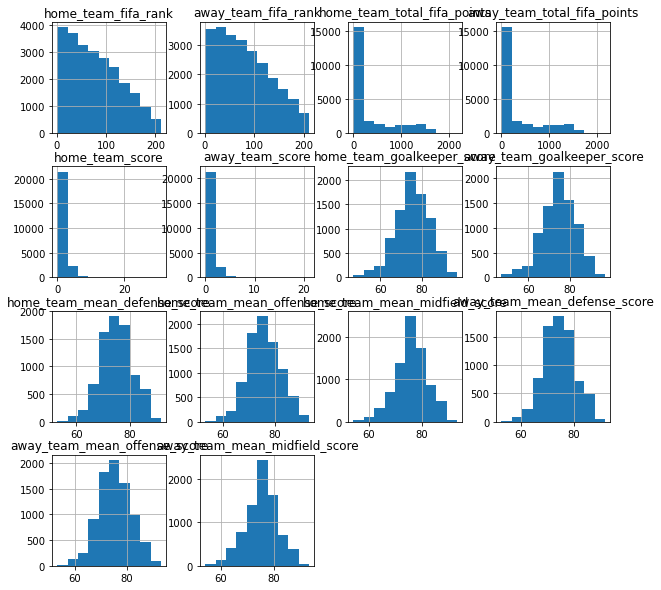

In [56]:
##View it as a histogram
dfhistall= df.hist(bins=10, figsize= (10,10))
print(dfhistall)

It is neat that the score data are normally distributed. It does not look like the frequency of home team score is any different than away team scores. Let's continue with the analysis.

In [57]:
## Check for Null values
print(df.isnull().sum())
## Check information of the data types
print(df.dtypes)
##extra seldf= df2.drop(df2.columns[[0,1,2,4,11,12,13,14,15]], axis = 1)

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64
date        

There are many unique dates because matches are reported in year-month-day format. We will a year column and then filter out earlier years such as 1993 because they contain lots of missing data.

In [58]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
print(df.year.unique())

[1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022]


We can see visualize the missing data by year:

<AxesSubplot:xlabel='dfnulls', ylabel='year_ob'>

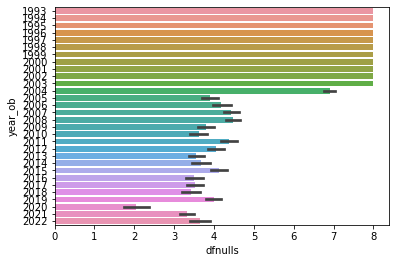

In [59]:
df["dfnulls"]= df.isnull().sum(axis=1)
##convert year to string/object to plot on y-axis
df["year_ob"]= df.year.astype("str")
##df.year_ob.dtype

nullsplot= sns.barplot(x="dfnulls", y="year_ob", data=df)
nullsplot

Now we will filter out the data until 2004, impute missing values with the mean of the column first so we can continue with training our models. We should also do this because players from 2004 and earlier are likely not still playing in Fifa 15 years later.

In [60]:
df2 = df.fillna(df.mean())
##df.head(3)
df2= df2[df2.year >= 2005]
df2.tail(3)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year,dfnulls,year_ob
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,74.000000,75.5,76.7,78.2,75.500000,76.0,78.2,2022,0,2022
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,74.212477,75.2,75.0,77.5,70.800000,72.3,74.0,2022,1,2022
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,74.212477,73.0,80.0,73.8,74.424379,79.3,70.8,2022,2,2022


In [61]:
## View unique values from home_team_continent
df["home_team_continent"].unique()

array(['South America', 'Africa', 'Europe', 'Oceania', 'Asia',
       'North America'], dtype=object)

Since we're going to evaluate the performance of continents vs eachother, we will filter "home_team_continent" column by home and away teams that do not match. For example, the match we are looking at are "Asia vs South America" or "Africa vs Europe" and not "North America vs North America" or "Asia vs Asia".

<AxesSubplot:xlabel='Count', ylabel='home_team_continent'>

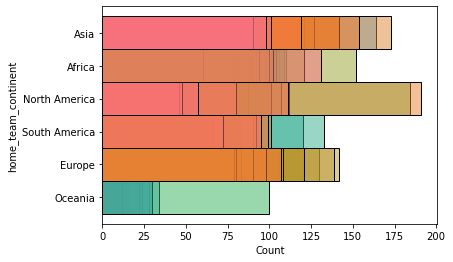

In [62]:
##Plot and visualize histogram of category counts
cateplot= sns.histplot(data=df2, y='home_team_continent', hue= 'home_team', legend= False)##, palette= "viridis")
cateplot

<AxesSubplot:xlabel='Count', ylabel='home_team_result'>

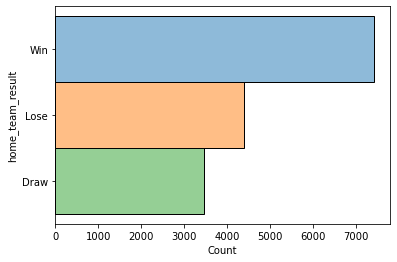

In [63]:
##Plot and visualize histogram of category counts
winplot= sns.histplot(data=df2, y='home_team_result', hue= 'home_team_result', legend= False)##, palette= "viridis")
winplot

In [64]:
## filter and check shape of new dataframe
df2filt= df2[df2["home_team_continent"]!= df2["away_team_continent"]]
df2filt.shape

(2681, 28)

Now let's keep label columns like home_team_continent and home_team_result as well as all the numeric features to prepare for train and test set splitting.

In [65]:
seldf= df2filt.drop(df2filt.columns[[0,1,2,4,11,12,13,14,15]], axis = 1)
seldf= seldf.drop(['year','dfnulls','year_ob'], axis=1)##, axis = 1)
##seldf= df.drop(df.iloc[:, 0:2].columns, axis = 1)
seldf
# show the dataframe

,home_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
8632,North America,153,63,0,0,2,1,Win,74.963838,79.000000,74.903249,75.818743,75.889292,69.000000,74.700000,75.259143
8634,South America,26,22,0,0,2,1,Win,80.000000,76.000000,80.800000,78.700000,70.200000,75.800000,76.700000,72.800000
8638,North America,71,26,0,0,1,1,Draw,74.963838,80.000000,74.903249,75.818743,75.889292,80.800000,78.700000,70.200000
8639,South America,29,21,0,0,1,1,Draw,75.000000,76.000000,74.500000,75.000000,68.200000,75.800000,76.700000,72.800000
8640,South America,61,115,0,0,1,0,Win,79.000000,74.212477,69.000000,74.700000,75.889292,74.424379,75.420019,75.259143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23895,Africa,156,205,1025,842,1,0,Win,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
23905,North America,90,174,1261,961,6,0,Win,66.000000,51.000000,74.903249,75.818743,63.000000,74.424379,75.420019,75.259143
23918,South America,28,60,1526,1387,0,0,Lose,79.000000,74.000000,75.500000,76.700000,78.200000,75.500000,76.000000,78.200000
23919,Asia,23,35,1553,1499,0,3,Lose,73.000000,74.212477,75.200000,75.000000,77.500000,70.800000,72.300000,74.000000


In [66]:
print("dataframe now has", len(seldf),"rows and", len(seldf.columns), "columns")

dataframe now has 2681 rows and 16 columns


### 2. Data preprocessing and dimensionality reduction with PCA

We have 16 columns but we can narrow this down to the most important components to use in our unsupervised hierarchical clustering model. First drop the categorical data, scale the numerice data so that they are compareable, and then use that data to determine optimal number of principle components.

In [67]:
## Balance our win_lose dataset
def checkgrouplength(data):
    for i in range(3):
        print(len(data[data == data.unique()[i]]))
##seldf2 = seldf.groupby('home_team_continent').sample(n=132)
##checkgrouplength(seldf["home_team_result"])
seldf2 = seldf.groupby('home_team_result').sample(n=599)
checkgrouplength(seldf2["home_team_result"])

599
599
599


In [68]:
## We'll do a first look at the home_team_continents without splitting train and test set data
## just to evualate our multiple clusters and model first.
## Seperate labels and features
dflab_hcont= pd.DataFrame(seldf["home_team_continent"])
df_hcont= seldf.drop(['home_team_continent','home_team_result'], axis=1)

## Filter out draws because we only want to see if home team has an advantage meaning if they take the win or not
df_wins= seldf2[seldf2['home_team_result']!='Draw']
dflab_hwins= pd.DataFrame(df_wins["home_team_result"])
df_hwins=  df_wins.drop(['home_team_continent','home_team_result'], axis=1)

In [69]:
## Check to see if correctly filtered
df_wins.home_team_result.unique(), df_wins.home_team_result.shape

(array(['Lose', 'Win'], dtype=object), (1198,))

<AxesSubplot:xlabel='Count', ylabel='home_team_result'>

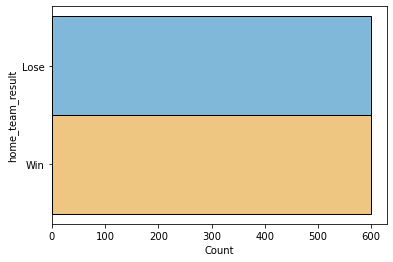

In [70]:
##Plot and visualize histogram of home win counts
cateplot2= sns.histplot(data=df_wins, y='home_team_result', hue= 'home_team_result', 
                        legend= False, palette= "colorblind")
cateplot2

In [71]:
## We'll split the data into train and validation set to get data and labels for predicting home team wins or losses
X_train, X_cv, y_train, y_cv = train_test_split(df_hwins, 
                                                    dflab_hwins, 
                                                    test_size = 0.3, 
                                                    random_state = 1234)

In [72]:
X_train.shape, X_cv.shape, y_train.shape, y_cv.shape

((838, 14), (360, 14), (838, 1), (360, 1))

In [73]:
dflab_hcont.head(5)

,home_team_continent
8632,North America
8634,South America
8638,North America
8639,South America
8640,South America


We're going to work with the home_team_continent data first.

In [74]:
## Time to scale
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_hcont)
## normalize to gaussian dist and convert to pandas Df
df_norm = pd.DataFrame(normalize(df_scaled))
## View to check if scaled correctly
df_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.686598,-0.010150,-0.332335,-0.336786,0.105336,-0.032922,-0.052229,0.280202,-0.028389,-0.049522,-0.039371,-0.443761,-0.096316,-0.013426
1,-0.279196,-0.326174,-0.328200,-0.332596,0.104025,-0.032513,0.248406,0.095616,0.436998,0.165129,-0.488429,0.108714,0.054061,-0.207508
2,0.062352,-0.306974,-0.341139,-0.345708,-0.152798,-0.033795,-0.053612,0.350372,-0.029141,-0.050834,-0.040414,0.531028,0.211254,-0.429161
3,-0.267328,-0.347866,-0.341942,-0.346522,-0.153157,-0.033874,-0.051494,0.099620,-0.062342,-0.114320,-0.673531,0.113266,0.056325,-0.216197
4,-0.017165,0.436127,-0.366127,-0.371031,-0.163990,-0.370428,0.210662,-0.013710,-0.550620,-0.147267,-0.043374,-0.002157,-0.046198,-0.014791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676,0.490296,0.759193,0.275129,0.195878,-0.102866,-0.232358,-0.036093,-0.008600,-0.019618,-0.034222,-0.027207,-0.001353,-0.028978,-0.009278
2677,0.082913,0.345159,0.228204,0.149542,0.452162,-0.135492,-0.238915,-0.576782,-0.011440,-0.019955,-0.431439,-0.000789,-0.016898,-0.005410
2678,-0.218145,-0.027385,0.615955,0.558647,-0.328743,-0.274254,0.155968,-0.020744,0.015714,0.013676,0.118688,0.069860,0.001527,0.180912
2679,-0.213240,-0.159630,0.540345,0.535460,-0.281223,0.400306,-0.119092,-0.008683,-0.003273,-0.077526,0.062452,-0.207340,-0.193686,-0.079641


In [75]:
##Determine number of components
pca = PCA(n_components = 2, random_state=1234)
df_pc = pd.DataFrame(pca.fit_transform(df_norm))
df_pc.columns = ['pc1', 'pc2']
##check first and last 3 rows
print(df_pc.head(3)), print(df_pc.tail(3))
print("dimesions of pca df are:", df_pc.shape)

        pc1       pc2
0 -0.520028  0.180878
1  0.207261  0.233734
2  0.048660  0.617812
           pc1       pc2
2678  0.586498 -0.403245
2679  0.355767 -0.444162
2680  0.412020 -0.513776
dimesions of pca df are: (2681, 2)


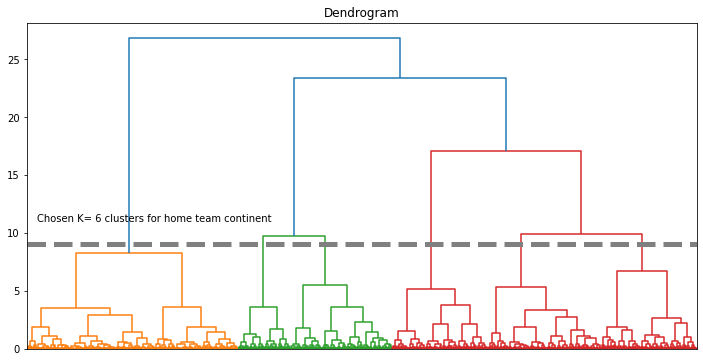

In [76]:
plt.figure(figsize =(12, 6))
plt.title('Dendrogram')
Dendrogram = shc.dendrogram((shc.linkage(df_pc, method ='ward')))
choose_max_dist= 9
##plt.xticks(rotation = 90)
plt.tick_params(labelbottom = False, bottom = False)
plt.text(400, 11, "Chosen K= 6 clusters for home team continent")
plt.axhline(y=choose_max_dist, color='gray', ls='--', lw=5)

### 3. Hierarchical, Kmeans clustering and performance evaluation

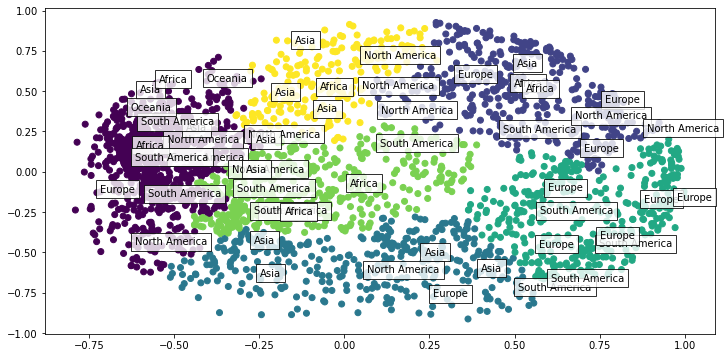

In [77]:
## Code to create incremental list to annotate every 100th row with a class ("home_team_continent") label

def outagglo(datcol,nclusts):
    def range_inc(start, stop, step, inc):
        i = start
        while i < stop:
            yield i
            i += step
            step += inc
    listforlabs= list(range_inc(0,round(len(datcol),-2), 50,0))

    ac6 = AgglomerativeClustering(n_clusters = nclusts)
    # Visualizing the clustering
    plt.figure(figsize =(12, 6))
    plt.scatter(df_pc['pc1'], df_pc['pc2'], c = ac6.fit_predict(df_pc), cmap ='viridis')
    for i in listforlabs:
        plt.text(x= df_pc['pc1'][i], 
                 y= df_pc['pc2'][i], 
                 ##s= list(dflab_hcont['home_team_continent'])[i], 
                 s= list(datcol)[i], 
                 fontdict=dict(color='black',size=10),
                 bbox=dict(facecolor='white',alpha=0.8))
    plt.show()

outagglo(dflab_hcont['home_team_continent'],6)

The clusters are interesting because we can see that there is the dark green cluster that has many European teams and the teal color has many Asian teams. However, seeing on a few labels for every 50 rows of data, points, it's hard to determine visuaully if there really is a significant distinction between our clusters. Let's look into the data furthur and evaluate it's performance

In [102]:
# build a model using n_clusters=6
def agglabels(df, nclusts):
    model=None
    hclust= AgglomerativeClustering(n_clusters= nclusts)
    model= hclust.fit(df)
    modellabel= model.labels_
    ##print(model)
    return modellabel

modellabel= agglabels(df_norm, 6)
modellabel

array([2, 4, 4, ..., 0, 0, 1], dtype=int64)

In [103]:
def label_permute_compare(ytdf,yp,n):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy.
    Example output: (3, 4, 1, 2, 0), 0.74
    """
    ## generate permuations of list
    lp= list(permutations(list(range(0,n))))
    acc_score= []
    for i in range(len(lp)):
        clist=list(ytdf.unique())
        newdf= ytdf.replace(clist, lp[i])
        acc_score.append(accuracy_score(np.array(newdf).flatten(),
                                        np.array(yp)))
    index= np.argmax(acc_score)
    return lp[index], round(acc_score[index],4)

In [104]:
labelorder, acc= label_permute_compare(ytdf=dflab_hcont.iloc[:,0],yp=modellabel,n=6)
print("Best label order is:", labelorder)
print("Highest accuracy is:", acc)

Best label order is: (4, 2, 1, 0, 5, 3)
Highest accuracy is: 0.2626


Let's view the confusion matrix

In [105]:
def test_and_pred(dfcol,plabs, labord):
    y_true= np.array(dfcol.
                     replace(list(dfcol.unique()),labord)).flatten()
    y_pred= np.array(plabs)
    return y_true, y_pred

y_true, y_pred= test_and_pred(dfcol=dflab_hcont["home_team_continent"],
                              plabs=modellabel,
                              labord= labelorder)

print("accuracy score:", round(accuracy_score(y_true, y_pred),4))
confusion_matrix(y_true, y_pred)

accuracy score: 0.2626


array([[261,  54, 127, 160,  69,  36],
       [ 68, 174, 184,   2, 101, 149],
       [133,  31, 128,  55,  37,  74],
       [  6,  28,  41,  10,  19,  28],
       [116,  68, 108,  46,  57,  59],
       [ 30,  40,  44,   4,  60,  74]], dtype=int64)

Let's compare the agglomerative hierarchal clustering model to __KMeans__ clustering. Does it perform better?


In [106]:
kmod= KMeans(n_clusters=6,random_state= 1234).fit(df_norm)
km_order, km_acc = label_permute_compare(ytdf=dflab_hcont.iloc[:,0],yp=kmod.labels_, n=6)
print("KMeans best label order:",km_order)
print("Kmeans best accuracy:", km_acc)

KMeans best label order: (5, 4, 2, 1, 0, 3)
Kmeans best accuracy: 0.2756


Looks like Kmeans performs slightly better.

Given that there are 6 teams, the chances of each one being being classified is roughly 16.67% assuming each group is relatively equal. In the context, our prediction being 26.26% accurate using Agglo and 27.56% using Kmeans is not too bad but not too great either. Now let's see if we can predict home_team_result more accurately given that there are only two classes, home win or lose. We'll go through the same process but evaluate it more in-depthly. We'll write evrything into a function so that we can do implement hyperparameter tuning afterwards to try to furthur imrpove our prediction accuracy score.

In [107]:
## Time to scale
##scaler = StandardScaler()
df_scaled2 = scaler.fit_transform(X_train)
## normalize to gaussian dist and convert to pandas Df
df_norm2 = pd.DataFrame(normalize(df_scaled2))

##Determine number of components
pca2 = PCA(n_components = 2, random_state=1234)
df_pc2 = pd.DataFrame(pca.fit_transform(df_norm2))
df_pc2.columns = ['pc1', 'pc2']
##check first and last 3 rows
print(df_pc2.head(3)), print(df_pc2.tail(3))
print("dimesions of pca df are:", df_pc2.shape)

        pc1       pc2
0  0.005929 -0.615058
1 -0.498429  0.108394
2 -0.405542 -0.127113
          pc1       pc2
835  0.366202 -0.013029
836 -0.126211  0.395740
837 -0.647634 -0.034943
dimesions of pca df are: (838, 2)


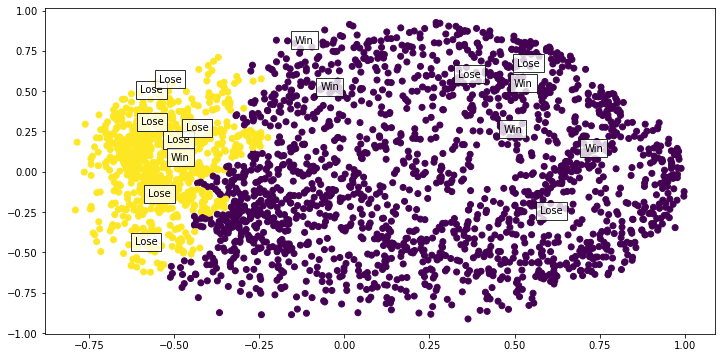

Named label order ['Lose' 'Win']
Best label order is: (0, 1)
Highest accuracy is: 0.5298


In [118]:
outagglo(y_train['home_team_result'],2)
mod2= agglabels(df_norm2, 2)
labelorder2, acc2= label_permute_compare(ytdf= y_train.iloc[:,0],yp=mod2,n=2)
print("Named label order", y_train['home_team_result'].unique())
print("Best label order is:", labelorder2)
print("Highest accuracy is:", acc2)

In [123]:
kmod= KMeans(n_clusters=2,random_state= 1234).fit(df_norm2)
km_order, km_acc = label_permute_compare(ytdf=y_train.iloc[:,0],yp=kmod.labels_, n=2)
print("KMeans best label order and best accuracy:",km_order, km_acc)

KMeans best label order and best accuracy: (0, 1) 0.5823


Now let's look more in depth at the confusion matrix and assess other performance metrics such as precision, recall from our hieracrchal model result.

Text(33.0, 0.5, 'Predicted label')

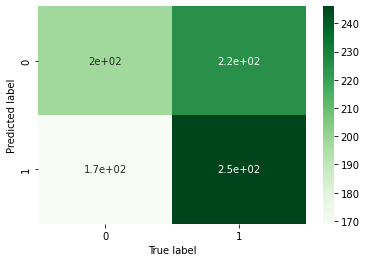

In [136]:
y_test2, y_pred2= test_and_pred(y_train['home_team_result'], mod2, labelorder2)

confmat2= confusion_matrix(y_test2, y_pred2)
sns.heatmap(confmat2, annot= True, cmap="Greens")
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [149]:
##tp, fp, tn, fn= confperf(y_test, y_pred)
tp, tn, fp, fn = confmat2[1, 1], confmat2[0, 0], confmat2[0, 1], confmat2[1, 0]
##sensitivity
sens= tp/(fn+tp)
##specificity
spec= tn/(tn+fp)
## precision
prec= metrics.precision_score(y_test2, y_pred2, average= "micro")
## recall
rec= metrics.recall_score(y_test2, y_pred2, average= "micro")
##f1
##
f1 =metrics.f1_score(y_test2, y_pred2, average = 'micro')
data = [['sensitivity', sens], ['specificity', spec],['precision', prec], ['recall', rec], ['F1', f1]]
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Metric', 'Value'])
# print dataframe
df

,Metric,Value
0,sensitivity,0.592771
1,specificity,0.468085
2,precision,0.529833
3,recall,0.529833
4,F1,0.529833


Let's try it on the Validation set. Do we get similar predictions?

In [153]:
##scaler = StandardScaler()
df_scaled3 = scaler.fit_transform(X_cv)
## normalize to gaussian dist and convert to pandas Df
df_norm3 = pd.DataFrame(normalize(df_scaled3))
mod3= agglabels(df_norm3, 2)
labelorder3, acc3= label_permute_compare(ytdf= y_cv.iloc[:,0],yp=mod3,n=2)
print("Named label order", y_cv['home_team_result'].unique())
print("Best label order is:", labelorder3)
print("Highest accuracy is:", acc3)

Named label order ['Win' 'Lose']
Best label order is: (0, 1)
Highest accuracy is: 0.5111


Looks like using making prediction on our validation/test set didn't yeiled better prediction results. Let's see if we can improve the accuracy by tuning our hyperparameters for our Agglomerative model. Let's write our own grid search code and implement it.

In [162]:
## Programmatically evaluate which linkage method and distance metric lead to the best performance
moddat= pd.DataFrame(columns= ["linkage", "affinity", "label_order","acc_score"])
links= ['ward', 'complete', 'average', 'single']
affin= ['euclidean','l1','l2','manhattan','cosine','precomputed']

for l in links:
    for aff in affin:
        ##bypass not working combinations such as ward and l2
        try:
            hclust= AgglomerativeClustering(n_clusters= 2,
                                            affinity= aff,
                                            linkage= l)
            modfit= hclust.fit(df_norm2)
            y_pred= modfit.labels_
            labelorder, acc = label_permute_compare(ytdf= y_train.iloc[:,0], yp= y_pred, n=2)
            rows= {"linkage":l,
                   "affinity": aff,
                   "label_order":labelorder,
                   "acc_score":acc}
            moddat= moddat.append(rows, ignore_index=True)
        except:
            pass
print("Hyperparameter tuning output:")
moddat

Hyperparameter tuning output:


,linkage,affinity,label_order,acc_score
0,ward,euclidean,"(0, 1)",0.5298
1,complete,euclidean,"(0, 1)",0.6158
2,complete,l1,"(0, 1)",0.6122
3,complete,l2,"(0, 1)",0.6158
4,complete,manhattan,"(0, 1)",0.6122
5,complete,cosine,"(0, 1)",0.6158
6,average,euclidean,"(0, 1)",0.5382
7,average,l1,"(0, 1)",0.5800
8,average,l2,"(0, 1)",0.5382
9,average,manhattan,"(0, 1)",0.5800


Named label order ['Lose' 'Win']
Best label order is: (0, 1)
Highest accuracy is: 0.6158


Text(33.0, 0.5, 'Predicted label')

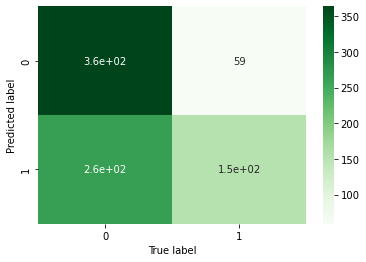

In [163]:
##Update our model with the best hyperparameters (we'll select one since all single linkage are same)
df_scaled4 = scaler.fit_transform(X_train)
## normalize to gaussian dist and convert to pandas Df
df_norm4 = pd.DataFrame(normalize(df_scaled4))

def aggupdate(df, nclusts):
    model=None
    hclust= AgglomerativeClustering(n_clusters= nclusts,
                                   linkage="complete",
                                   affinity="l2")
    model= hclust.fit(df)
    modellabel= model.labels_
    ##print(model)
    return modellabel

mod4= aggupdate(df_norm4, 2)
labelorder4, acc4= label_permute_compare(ytdf= y_train.iloc[:,0],
                                         yp=mod4,n=2)
print("Named label order", y_train['home_team_result'].unique())
print("Best label order is:", labelorder4)
print("Highest accuracy is:", acc4)
y_test4, y_pred4= test_and_pred(y_train['home_team_result'], mod4, labelorder4)
confmat4= confusion_matrix(y_test4, y_pred4)
sns.heatmap(confmat4, annot= True, cmap="Greens")
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [169]:
##tp, fp, tn, fn= confperf(y_test, y_pred)
tp, tn, fp, fn = confmat4[1, 1], confmat4[0, 0], confmat4[0, 1], confmat4[1, 0]
##sensitivity
sens= tp/(fn+tp)
##specificity
spec= tn/(tn+fp)
## precision
prec= metrics.precision_score(y_test4, y_pred4, average= "micro")
## recall
rec= metrics.recall_score(y_test4, y_pred4, average= "micro")
##f1
##
f1 =metrics.f1_score(y_test4, y_pred4, average = 'micro')
data = [['sensitivity', sens], ['specificity', spec],['precision', prec], ['recall', rec], ['F1', f1]]
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Metric', 'Value'])
# print dataframe
df.T

,0,1,2,3,4
Metric,sensitivity,specificity,precision,recall,F1
Value,0.366265,0.86052,0.615752,0.615752,0.615752


The sensitivity we got was 0.37 indicating the ones predicted positive that were actually postive were pretty low. On the other hand, specificity was 0.86 indicating that the ones predicted negative that were actually negative were really high F1 score is the measure of performance of the models classification ability and is the balance between precision and recall with value from 0(no predictive accuracy) to 1(perfect predictive accuracy). It is typically a better assessemnt than accuracy score. A value of 0.62 shows that model has pretty average prediction accuracy and if we look into the model performance metrics, the model is good at predicting home team losers correctly but is not accurate at predicting home to winners. 

### 4. Compare unsupervised clustering to supervised models: cnb, knn, adb and rf

Now let's compare our predictions to supervised learning predictions and before we make final remarks on whether there really is home team advantage. We will be using common or default hyperparameters for categorical naive bayes, k-nearest neighbors, adaboost and randomforest, and reporting RMSE and accuracy score. 

In [165]:
##Create function for outputting machine learning model accuracy score and RMSE
res = {'Lose': 0,'Win': 1}

def SuperMLmetrics(labeldict, trainnorm, trainlabs, valnorm, vallabs):
    cnb = CategoricalNB()
    knn = KNeighborsClassifier(n_neighbors=5)
    adb = AdaBoostClassifier(n_estimators=100, random_state=1234)
    rf= RandomForestClassifier(max_depth=10, random_state=1234)
    listml= [cnb, knn, adb, rf]
    moddat= pd.DataFrame(columns= ["Model", "RMSE", "Accuracy", "Precision","Recall","F1"])
    ##confmats= []

    for mod in listml:
        res= labeldict
        mod.fit(trainnorm, trainlabs)
        y_pred= mod.predict(valnorm)
        int_y_pred = [res[item] for item in y_pred]
        int_y_cv= [res[item] for item in np.array(vallabs["home_team_result"])]
        model_name = type(mod).__name__
        acc_score= round(accuracy_score(int_y_pred, int_y_cv),3)
        ##acc_score= round(mod.score(df_norm3, y_cv),3)
        rmse= round(mean_squared_error(int_y_cv, int_y_pred, squared=False),3)
        prec= round(metrics.precision_score(int_y_cv, int_y_pred, average= "micro"),3)
        rec= round(metrics.recall_score(int_y_cv, int_y_pred, average= "micro"),3)
        f1 = round(metrics.f1_score(int_y_cv, int_y_pred, average = 'micro'),3)

        rows= {"Model":model_name, "RMSE":rmse, "Accuracy":acc_score, 
               "Precision":prec,"Recall":rec,"F1":f1}
        moddat= moddat.append(rows, ignore_index=True)
    return moddat

modeltable= SuperMLmetrics(res, df_norm4, y_train, df_norm3, y_cv)
modeltable

,Model,RMSE,Accuracy,Precision,Recall,F1
0,CategoricalNB,0.715,0.489,0.489,0.489,0.489
1,KNeighborsClassifier,0.217,0.953,0.953,0.953,0.953
2,AdaBoostClassifier,0.091,0.992,0.992,0.992,0.992
3,RandomForestClassifier,0.091,0.992,0.992,0.992,0.992


Wow, the accuracy score are really, showing that usuing unsupervised models such as knn and tree based models like adb and rf, we are able to get high prediction accuracy of whether home team loses or wins. To satisfy our curiousity, let's see how our models perform on unbalanced data that has all 3 catergories (win, lose or draw)

In [166]:
## Get orginal unblanaced data and keep all 3 home_team_result classes: Win, Lose, Draw
dat_3lab= pd.DataFrame(seldf["home_team_result"])
dat_3feats= seldf.drop(['home_team_continent','home_team_result'], axis=1)

## split data:
X3t, X3cv, y3t, y3cv = train_test_split(dat_3feats, 
                                        dat_3lab, 
                                        test_size = 0.3, 
                                        random_state = 1234)
## Scale for distance-based models. Doesn't matter for tree based bosed
scaler = StandardScaler()
## train
train_scaled3 = scaler.fit_transform(X3t)
train_norm3 = pd.DataFrame(normalize(train_scaled3))
## cross validation (or test) set
val_scaled3 = scaler.fit_transform(X3cv)
val_norm3 = pd.DataFrame(normalize(val_scaled3))

In [167]:
res2 = {'Lose': 0,'Win': 1, 'Draw':2}
SuperMLmetrics(res2, train_norm3, y3t, val_norm3, y3cv)

,Model,RMSE,Accuracy,Precision,Recall,F1
0,CategoricalNB,0.726,0.473,0.473,0.473,0.473
1,KNeighborsClassifier,0.719,0.763,0.763,0.763,0.763
2,AdaBoostClassifier,0.424,0.928,0.928,0.928,0.928
3,RandomForestClassifier,0.345,0.955,0.955,0.955,0.955


Lastly, we'll visualize the overall performance.

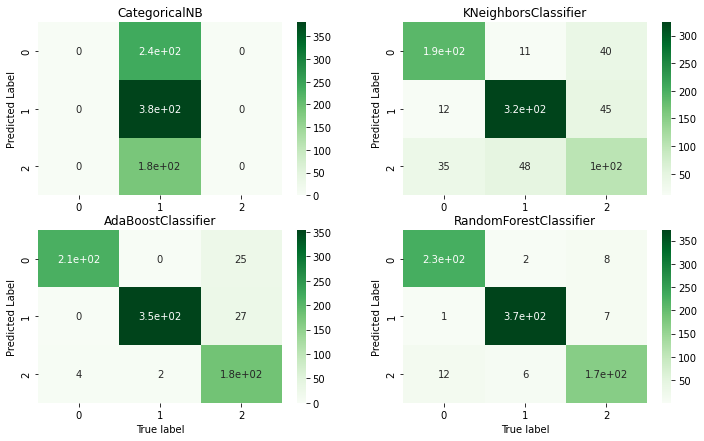

In [168]:
##fig, axes = plt.subplots(4,1)
cnb = CategoricalNB()
knn = KNeighborsClassifier(n_neighbors=5)
adb = AdaBoostClassifier(n_estimators=100, random_state=1234)
rf= RandomForestClassifier(max_depth=10, random_state=1234)
listml= [cnb, knn, adb, rf]
listx= [0,0,1,1]
listy= [0,1,0,1]
##train_norm3, y3t, val_norm3, y3cv
fig, ax = plt.subplots(2,2, figsize=(12,7), sharey= False)
for (mod, i, j) in zip(listml,listx, listy):
    res= res2
    mod.fit(train_norm3, y3t)
    y_pred= mod.predict(val_norm3)
    int_y_pred = [res[item] for item in y_pred]
    int_y_cv= [res[item] for item in np.array(y3cv["home_team_result"])]
    confmat= confusion_matrix(int_y_cv, int_y_pred)
    ##plt.figure()
    sns.heatmap(confmat, annot= True, cmap="Greens", ax=ax[i,j])
    ax[i][j].set_title(type(mod).__name__)
    ax[1][0].set_xlabel("True label")
    ax[1][1].set_xlabel("True label")
    ax[i][j].set_ylabel("Predicted Label")
    ##plt.xlabel("True label")
    ##plt.ylabel("Predicted label")
fig.show()

Even inlcluding the additional class and unbalanced data, the unsupervised tree classifiers such as adaboost and randomforest have really high true positives in all catergories especially predicting home wins, loss and draws and correctly presenting a higher number of wins for validation/test data.

### 5. Discussion/Conclusion

In this project, we analyzed the Fifa World Cup 2022 dataset to see if we can cluster home team continent accurately as well predict whether the home team has an advantage over away teams.

We explored and visualized the data including looking at feature statistics and imputed missing data along with filtering out irrelevant rows and columns.

We pre-processed the data, splitting our data into training and validation/testing sets as well as scaling and normalizing our features.

We performed unsupervised learning with PCA, hierachical/agglomerative clustering and Kmeans clustering and used hyperparameter tuning to improve our Heirarchical clustering performance.

Our best heirarchical model was one that predicted home team loses correctly while it had low sensitivty for home team wins. This is good news for soccer fans because our findings show that there really is no strong conclusion for the home having a significant advantage. 

When we compare this results to results unsupervised models however, tree based models such as ababoost and randomforest classifiers did very well at predicting true classes. Categorical naive bayes did not do so well while distance-based supervised learning k-nearest neighbors did ok. Although these results overall seemingly have high contrast with our supervised methods and could justify strong claims for home team advantage, furthur analysis should be done to make sure we are not overfitting our models.

It'd be interesting to use collabortaive filtering or matrix factorization on this dataset to see if those approaches can improve the predictions for home team continent or results or even predict which team is likely to win this year's 2022 cup. But for now, I'll be relaxing and enjoying the games no matter which team ends up winning it all.